#Image Processing

In this notebook, we will explore some Python tools for image processing.

First, upload the full moon images from the `class-notes/photos/` folder to your Colab session, using the folder icon ("Files") to the left.  You should see an icon to upload files ("Upload to session storage").

If you are successful, you should see the four files to the left, and you should see their names when you execute the following command.

In [1]:
!ls

Orion Nebula 2024-02-24 223719.png
PHY307Notebook1.ipynb
PHY307Notebook4Photos
PHY307Notebook4Photos.zip
Pleiades 2024-02-24 223105.png
Untitled.ipynb
exoplanets data.ipynb
full-moon-10ms.PNG
full-moon-20ms.PNG
full-moon-230us.PNG
full-moon-5ms.PNG
notebook_02.ipynb
notebook_03.ipynb
notebook_04.ipynb


Next, import the Python libraries we will use.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import random as rng		# import random number generator
import scipy.ndimage as sim					# image processing module

## Images as Arrays

The following cell illustrates how to load an image as a NumPy array and view it using Matplotlib.

(-0.5, 4655.5, 3519.5, -0.5)

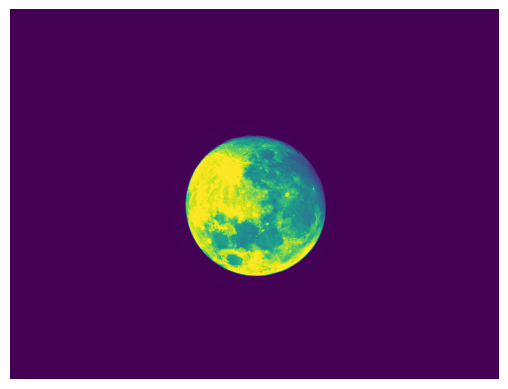

In [3]:
# Set data directory for cat photo.
data_directory = "./"

# Import the photograph using PyPlot.
photo = plt.imread(data_directory + 'full-moon-10ms.PNG')

plt.figure()
plt.imshow(photo)
plt.axis('off')


We have the image, but it's not displayed using the proper color scheme.

Do a Google search or get an AI assist and display the image in black and white.

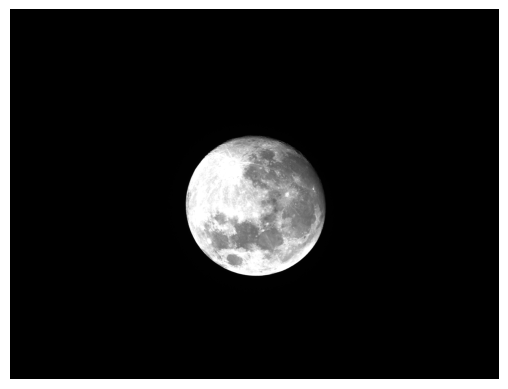

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# No need to re-import if you've already done so

# Your existing code for loading the image
data_directory = "./"
photo = plt.imread(data_directory + 'full-moon-10ms.PNG')

# Corrected grayscale conversion function
def rgb2gray(rgb):
    if rgb.ndim == 3:
        # Ensure the dot product happens in a way that preserves the image's 2D structure
        return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.float32)
    else:
        # If the image is already 2D, just return it
        return rgb

gray_photo = rgb2gray(photo)

# Check if conversion results in a 2D array
assert gray_photo.ndim == 2, "The grayscale image is not 2D."

# Display the grayscale image
plt.figure()
plt.imshow(gray_photo, cmap='gray')
plt.axis('off')
plt.show()


This is the original data.  We would now like to do some image processing on the array.  To NumPy, this photograph is now just an array of integers.  We can do any mathematical operations on it that we could do on another array.

Run the following code.  Compare the output image to the original.  Try to explain why it looks the way it does.

Text(0.5, 1.0, 'High Contrast')

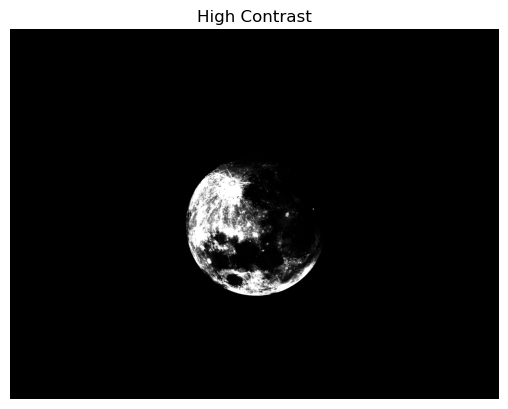

In [5]:
plt.figure()
plt.imshow(photo**8)
plt.axis('off')
plt.gray()
plt.title("High Contrast")

By bringing the pixel values to the 8th power it increases image contrast, significantly darkening most areas while slightly brightening the brightest spots.

Do some other numerical transformations to the data.  Leave the code for your most interesting image below.

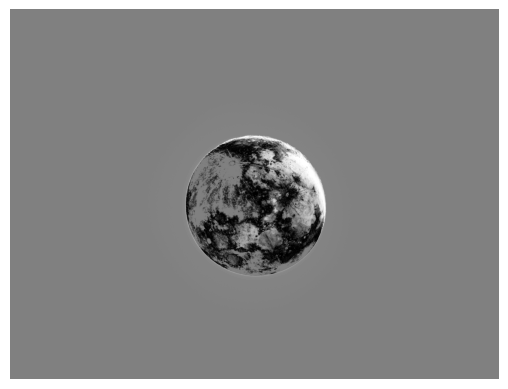

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the previous imports and data directory setup is used

# Import the photograph using PyPlot.
photo = plt.imread(data_directory + 'full-moon-10ms.PNG')

# Apply a sine transformation to the photo
# First, normalize the photo's pixel values to the range [0, 1] if they are not already
if photo.dtype == np.uint8:
    photo_normalized = photo / 255.0
else:
    photo_normalized = photo

# Apply the sine transformation
photo_sine = np.sin(photo_normalized * np.pi * 2)  # Multiply by 2π to ensure a full sine wave cycle

# Rescale back to [0, 255] for display
photo_transformed = np.clip((photo_sine + 1) / 2 * 255, 0, 255).astype(np.uint8)

# Display the transformed image
plt.figure()
plt.imshow(photo_transformed)
plt.axis('off')
plt.show()


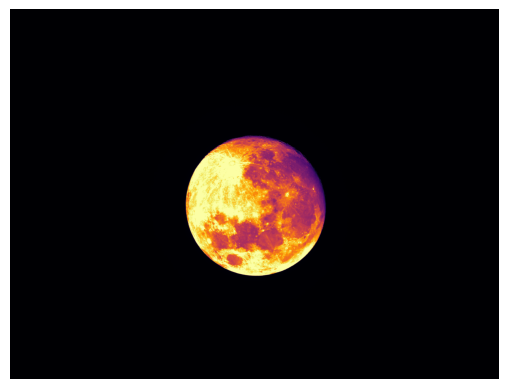

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you've already loaded the image into 'photo'
photo = plt.imread(data_directory + 'full-moon-10ms.PNG')

# Convert the photo to grayscale for intensity manipulation
def rgb2gray(rgb):
    if rgb.ndim == 3:
        return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return rgb

gray_photo = rgb2gray(photo)

# Normalize the grayscale image to be between 0 and 1
normalized_gray = gray_photo / np.max(gray_photo)

# Apply a color map based on intensity
# Use the 'inferno' colormap for a vibrant effect, but feel free to try 'plasma', 'magma', or others
color_mapped_photo = plt.cm.inferno(normalized_gray)

# Display the transformed image
plt.figure()
plt.imshow(color_mapped_photo)
plt.axis('off')
plt.show()


-----

We can take slices through the array, and plot the values for any row or column in the image.

In [8]:
# Get the dimensions of the image.
Imax, Jmax = photo.shape

2328
1900
4656
3520


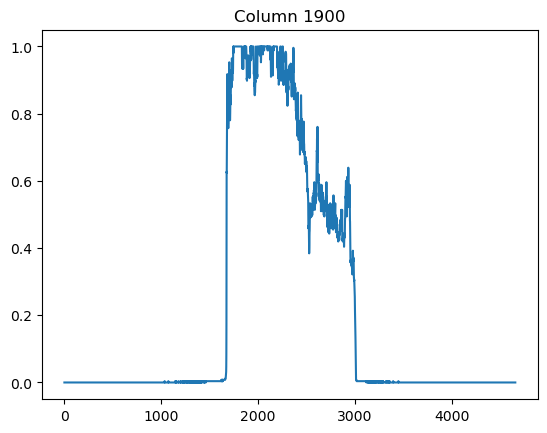

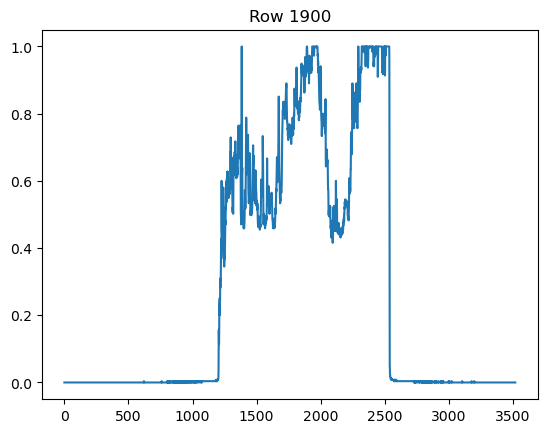

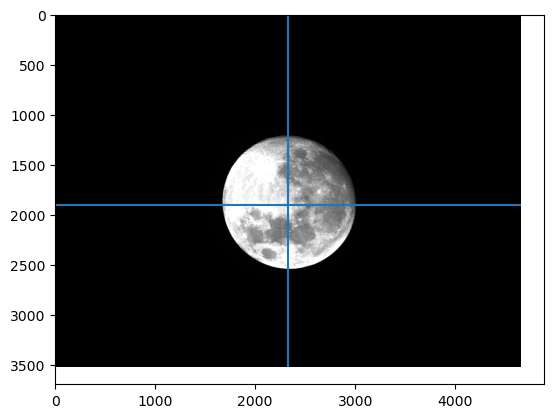

In [9]:
# Plot a column of the image.
plt.figure()
I = 1900
plt.plot(photo[I,:])
plt.title("Column %d" % I)

# Plot a row of the image.
plt.figure()
J = 2000
J = Jmax // 2
plt.plot(photo[:,J])
plt.title("Row %d" % I)

# Show the image, with the row and column.
plt.figure()
plt.imshow(photo)
plt.gray()
plt.vlines(J, 0, Imax)
plt.hlines(I, 0, Jmax)
print(J)
print(I)
print(Jmax)
print(Imax)

Adjust the values of `I` and `J` above to cut through the center of the moon.

- What are the coordinates of the center of the moon?
- How many pixels across is it, left to right?
- How many pixels across is it, top to bottom?

-Coordinates: (2328, 
190)
-It is 4656 pixels left to right
-It is 3520 pixels up and down
00

To see if anything other than the moon is in the photo, we can try to get rid of the brightest pixels.  Adjust `threshold` below to try and get rid of the moon.  It should be a number between 0.0 and 1.0.

`no_moon` will be a new array with all of the pixels brighter than `threshold` set to 0.

(-0.5, 4655.5, 3519.5, -0.5)

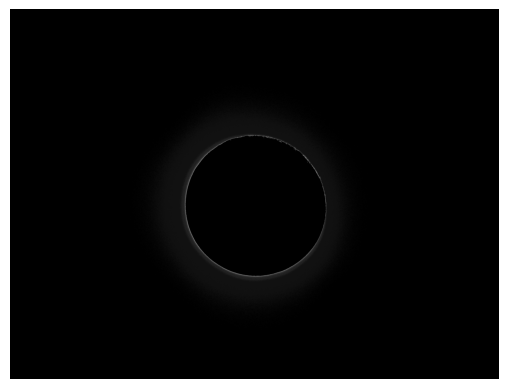

In [10]:
threshold = 0.06

plt.figure(dpi=100)
no_moon = photo - photo * (photo > threshold)
plt.imshow(no_moon)
plt.gray()
plt.axis('off')

- Describe how the image changes as you lower the threshold from 1.0 to 0.0.
- At what point do you start to see the "glow" around the moon?
- Does the moon have a sharp edge?
- At what point do you see nothing at all?

- Describe how the image changes as you lower the threshold from 1.0 to 0.0.
- The image slowly gets more blotted out, getting more and more dark.
  
- At what point do you start to see the "glow" around the moon?
  ~ 0.12 is when it starts to only be glow
- Does the moon have a sharp edge?
  I would say yes it does
- At what point do you see nothing at all?
  0 is the only value that I saw nothing at all

The approach above may not be ideal, because it sets ALL the pixels brighter than the threshold equal to zero.  We might be throwing away something other than the moon — like stars we would like to study.

Use the values you determined for the center and width of the moon in the code below to erase the moon from the image.

`I0` and `J0` should be the center of the moon.

`dI` and `dJ` should be the radius of the moon.

These values should be integers.

(-0.5, 4655.5, 3519.5, -0.5)

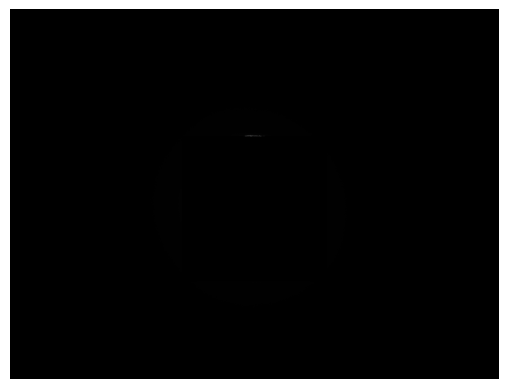

In [11]:
I0 = 1900
J0 = 2328
dI = 690
dJ = dI

# Create an array of ones the same shape as the photo.
pixels_to_keep = np.ones_like(photo, dtype=bool)

# Set the moon pixels to zero.
pixels_to_keep[I0-dI:I0+dI, J0-dJ:J0+dJ] = 0

# Get rid of the moon pixels.
no_moon = photo * pixels_to_keep

# View the result.
plt.figure()
plt.imshow(no_moon)
plt.gray()
plt.axis('off')

What, if anything, is left in the image after you remove the moon?

Nothing, presumably because I did it correctly ;)

-----

## Exposure

There are three other images of the full moon, each taken with a different exposure.  (`full-moon-230us.png` is a 230 µs exposure — the shortest of the 4, but with the digital ***gain** turned up to make bright pixels brighter.)

Repeat the analysis for the other images.

1. Find the center and diameter of the moon in each image.
2. Use your favorite method to remove the moon from the image and look for other objects in the photograph.

Include your code and comments below.

4656
3520


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

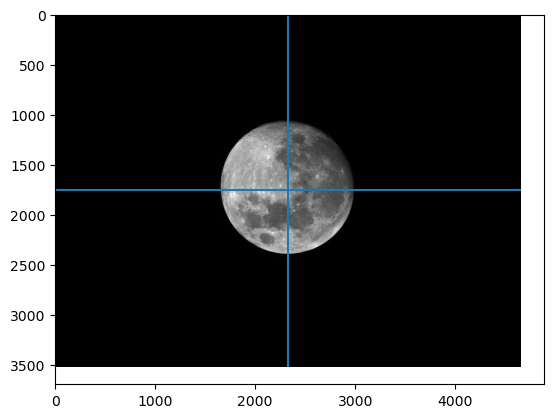

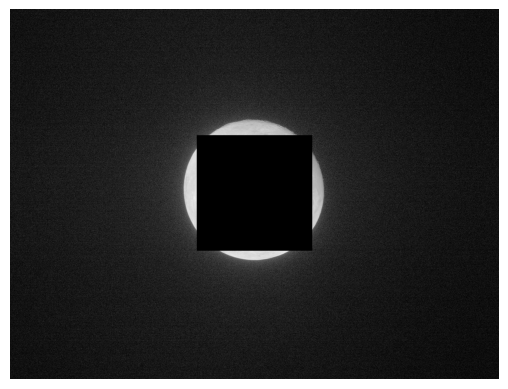

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Import OpenCV for additional image processing

# Import the photograph using PyPlot.
photo = plt.imread(data_directory + 'full-moon-230us.png')

# Determine the maximum dimensions of the photo for plotting
Imax, Jmax = photo.shape[0], photo.shape[1]

# Plot a column of the image.
plt.figure()
I = 1750
#plt.plot(photo[I,:])
#plt.title("Column %d" % I)

# Plot a row of the image.
plt.figure()
J = 2000
J = Jmax // 2
#plt.plot(photo[:,J])
#plt.title("Row %d" % I)

# Show the image, with the row and column.
plt.figure()
plt.imshow(photo)
plt.gray()
plt.vlines(J, 0, Imax)
plt.hlines(I, 0, Jmax)
#print(J)
#print(I)
print(Jmax)
print(Imax)

I0 = I
J0 = J
dI = 550
dJ = dI

# Create an array of ones the same shape as the photo.
pixels_to_keep = np.ones_like(photo, dtype=bool)

# Set the moon pixels to zero.
pixels_to_keep[I0-dI:I0+dI, J0-dJ:J0+dJ] = 0

# Get rid of the moon pixels.
no_moon = photo * pixels_to_keep

# Moderately adjust exposure
exposure_adjustment_factor = 1.5  # Adjust this factor to a more reasonable value
no_moon_adjusted = np.clip(no_moon * exposure_adjustment_factor, 0, 255)

# Apply Gamma Correction for contrast enhancement
gamma = 5  # Gamma value, adjust based on your image for desired contrast
no_moon_gamma_corrected = 255 * ((no_moon_adjusted / 255) ** (1 / gamma))

no_moon_gamma_corrected = np.clip(no_moon_gamma_corrected, 0, 255).astype(np.uint8)

# Noise Reduction using Gaussian Blur
blurred = cv2.GaussianBlur(no_moon_gamma_corrected, (5, 5), 0)

# Apply Unsharp Masking for sharpening
# The kernel size for Gaussian blurring; the larger, the more blur.
gaussian_blur_kernel_size = (13, 13)
amount = 5  # The amount to be added back to the original
blurred_for_unsharp = cv2.GaussianBlur(blurred, gaussian_blur_kernel_size, 0)
unsharp_mask = cv2.addWeighted(blurred, 1.5, blurred_for_unsharp, -0.5, 0)


# View the result with noise reduction and sharpening applied
plt.figure()
plt.imshow(unsharp_mask, cmap='gray')
plt.axis('off')
plt.show()



- Which photograph seems the best for studying features on the moon?  Why?
- Which photograph seems the best for studying features other than the moon?  Wjhy?

I would say the 230us has the best features for studying the moon. I say this because 1) it's centered, 2) it is the least exposed, and 3) It looks nice.

The 20ms one seems best for looking at non-lunar objects. Although I was unable to find anything I believe it is the only one that had a good chance.

-----
## Plate Scale

To actually measure the position of anything in the images, we need to determine the ***plate scale*** the number of degrees in the sky per pixel in the image.

The angular diameter of the moon is 31', or 31 arcminutes.

- Using your measurements of the diameter of the moon, what is the plate scale of these images?

- Is the plate scale the same in the horizontal and vertical directions?

- What is the ***field of view*** — the angular size, in degrees of the entire image?  Report your result as a rectangular width: e.g., 15° x 25.7°.

The moon is about 1300 Pixels. The moon is 31 arcminutes.
(31 arcminutes / moon) / 1300 (pixels / moon) = ~ 0.024 (arcminutes/ pixels) = 1.44 (arcseconds / pixels)

The plate scale is the same horizontal and vertical because the moon is 1300 pixels in both directions.

 0.024 (arcminutes/ pixels) * 4656 pixels x 
352 pixels = 111.74 arcminutes x 84.48 arcminutes
 = 1.84 X 1.41 Degrees 0


------
## Other Images

There are two other images in the `class-notes/photos/` folder.  Load them, plot them, and analyze them.

1804 2637


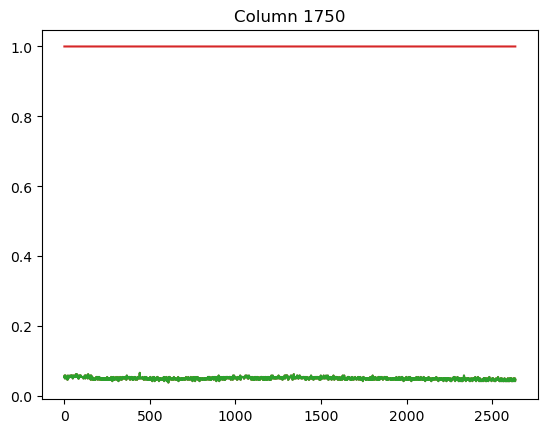

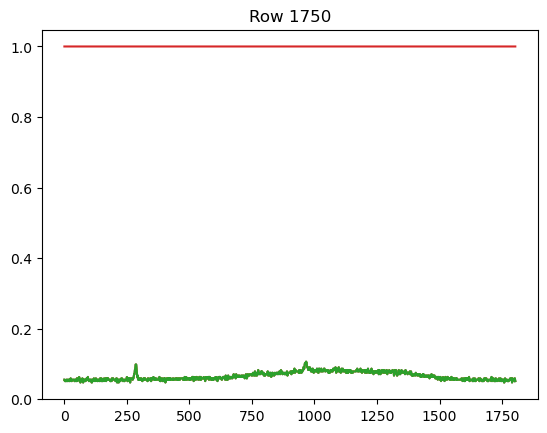

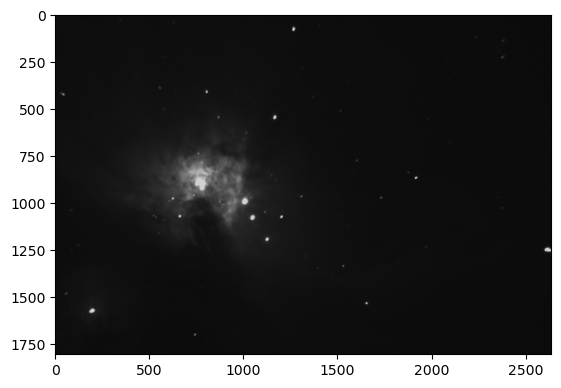

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Import OpenCV for additional image processing

# Import the photograph using PyPlot.
photo = plt.imread(data_directory + 'Orion Nebula 2024-02-24 223719.png')

# Determine the maximum dimensions of the photo for plotting
Imax, Jmax = photo.shape[0], photo.shape[1]

# Plot a column of the image.
plt.figure()
I = 1750
plt.plot(photo[I,:])
plt.title("Column %d" % I)

# Plot a row of the image.
plt.figure()
J = 2000
J = Jmax // 2
plt.plot(photo[:,J])
plt.title("Row %d" % I)

# Show the image, with the row and column.
plt.figure()
plt.imshow(photo)
plt.gray()

print(Imax, Jmax)




1822 2635


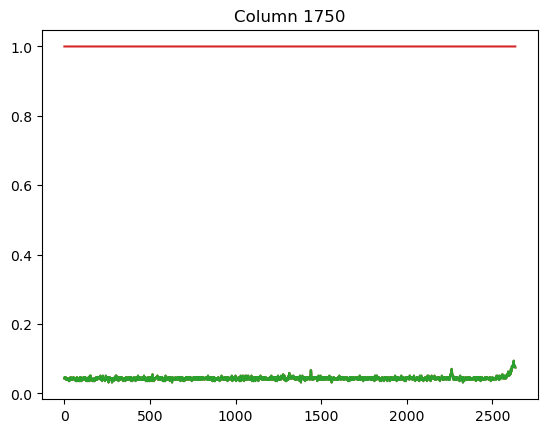

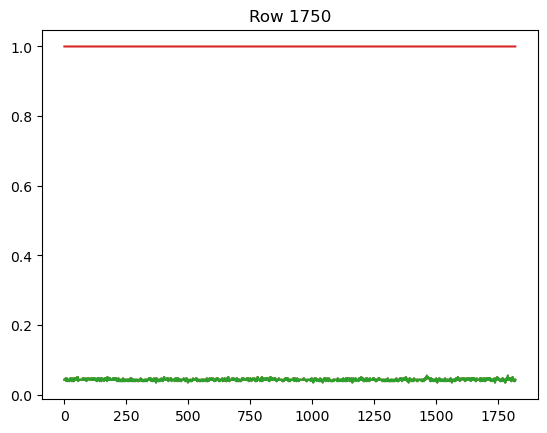

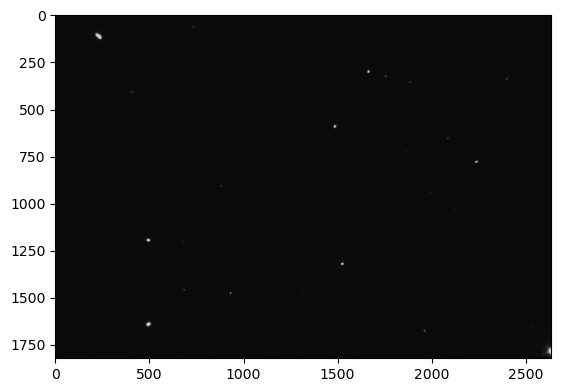

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Import OpenCV for additional image processing

# Import the photograph using PyPlot.
photo = plt.imread(data_directory + 'Pleiades 2024-02-24 223105.png')

# Determine the maximum dimensions of the photo for plotting
Imax, Jmax = photo.shape[0], photo.shape[1]

# Plot a column of the image.
plt.figure()
I = 1750
plt.plot(photo[I,:])
plt.title("Column %d" % I)

# Plot a row of the image.
plt.figure()
J = 2000
J = Jmax // 2
plt.plot(photo[:,J])
plt.title("Row %d" % I)

# Show the image, with the row and column.
plt.figure()
plt.imshow(photo)
plt.gray()


print(Imax, Jmax)


- What does a slice through star look like?
- How is the profile of a star similar to the moon?  How is it different?
- What does a slice through the nebula look like?

***REPALCE WITH YOUR RESPONSE.***

Try to determine the plate scale of both of these images.

- What is the plate scale of the Pleiades image?
- What is the plate scale of the Orion Nebula image?

In [ ]:
PLEIADES
Atlas is the bottom leftmost star. This star is next to pleione. They are 5 arcminutes apart. They are about 450 pixels apart.
5 arcminutes / 450 pixels = 0.011 (arcminutes / pixel). 
The plate scale is 1822 pixels x 2635 pixels * .011 (arcminutes / pixel)
= 20.22 arcminutes X 29.25 arcminutes

ORION NEBULA
Orion has mintaka and alnilam visible, the top two stars of the L. They are 1.4 arcminutes apart. They are about 60 pixels apart (angled).
1.4 arcminutes / 60 pixels = .0233 (arcminutes / pixel). 
The plate scale is 1804 x 2637 pixels * 0.0233 (arcminutes / pixel)
= 42.03 x 61.44 arcminutes